In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Titanic_Train/Train.csv")

In [4]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.7500,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.0000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.0000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.2500,NaN,Q,16,NaN,NaN
5,2.0,0.0,"Gaskell, Mr. Alfred",male,16.0,0.0,0.0,239865,26.0000,NaN,S,NaN,NaN,"Liverpool / Montreal, PQ"
6,2.0,0.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,S.O./P.P. 2,21.0000,NaN,S,NaN,NaN,"Ilfracombe, Devon"
7,1.0,1.0,"Leader, Dr. Alice (Farnham)",female,49.0,0.0,0.0,17465,25.9292,D17,S,8,NaN,"New York, NY"
8,1.0,0.0,"Brandeis, Mr. Emil",male,48.0,0.0,0.0,PC 17591,50.4958,B10,C,NaN,208.0,"Omaha, NE"
9,2.0,0.0,"Wheeler, Mr. Edwin ""Frederick""",male,NaN,0.0,0.0,SC/PARIS 2159,12.8750,NaN,S,NaN,NaN,NaN


In [5]:
columns_to_drop = ['name','ticket','cabin','embarked', 'home.dest', 'boat', 'body']

data_clean = data.drop(columns_to_drop,axis=1)

In [6]:
data_clean.head(10)

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,female,NaN,0.0,0.0,7.7500
1,2.0,0.0,male,39.0,0.0,0.0,26.0000
2,2.0,1.0,female,40.0,0.0,0.0,13.0000
3,3.0,1.0,female,31.0,1.0,1.0,20.5250
4,3.0,1.0,female,NaN,2.0,0.0,23.2500
5,2.0,0.0,male,16.0,0.0,0.0,26.0000
6,2.0,0.0,male,43.0,0.0,1.0,21.0000
7,1.0,1.0,female,49.0,0.0,0.0,25.9292
8,1.0,0.0,male,48.0,0.0,0.0,50.4958
9,2.0,0.0,male,NaN,0.0,0.0,12.8750


In [7]:
data_clean.shape

(1009, 7)

In [8]:
#Encoding the gender column
from sklearn.preprocessing import LabelEncoder
#Converting gender column to numerical format
le = LabelEncoder()
data_clean["sex"] = le.fit_transform(data_clean["sex"])

In [9]:
data_clean

,pclass,survived,sex,age,sibsp,parch,fare
0,3.0,0.0,0,NaN,0.0,0.0,7.7500
1,2.0,0.0,1,39.0,0.0,0.0,26.0000
2,2.0,1.0,0,40.0,0.0,0.0,13.0000
3,3.0,1.0,0,31.0,1.0,1.0,20.5250
4,3.0,1.0,0,NaN,2.0,0.0,23.2500
...,...,...,...,...,...,...,...
1004,1.0,1.0,1,40.0,0.0,0.0,31.0000
1005,3.0,0.0,0,37.0,0.0,0.0,9.5875
1006,1.0,1.0,0,23.0,1.0,0.0,113.2750
1007,3.0,1.0,1,12.0,1.0,0.0,11.2417


In [10]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
pclass      1009 non-null float64
survived    1009 non-null float64
sex         1009 non-null int64
age         812 non-null float64
sibsp       1009 non-null float64
parch       1009 non-null float64
fare        1008 non-null float64
dtypes: float64(6), int64(1)
memory usage: 55.3 KB


In [11]:
#fill na of age
avg_age = data_clean["age"].mean()
print(avg_age)

29.838977832512317


In [12]:
data_clean = data_clean.fillna(avg_age)
data_clean.info()
# now there is no empty cell in age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
pclass      1009 non-null float64
survived    1009 non-null float64
sex         1009 non-null int64
age         1009 non-null float64
sibsp       1009 non-null float64
parch       1009 non-null float64
fare        1009 non-null float64
dtypes: float64(6), int64(1)
memory usage: 55.3 KB


In [13]:
data_clean["pclass"] = [int(x) for x in data_clean["pclass"]]
data_clean["survived"] = [int(x) for x in data_clean["survived"]]
data_clean["sibsp"] = [int(x) for x in data_clean["sibsp"]]
data_clean["parch"] = [int(x) for x in data_clean["parch"]]

In [14]:
data_clean.columns = ['Pclass', 'Survived', 'Sex','Age','SibSp', 'Parch', 'Fare']
data_clean.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
0,3,0,0,29.838978,0,0,7.750
1,2,0,1,39.000000,0,0,26.000
2,2,1,0,40.000000,0,0,13.000
3,3,1,0,31.000000,1,1,20.525
4,3,1,0,29.838978,2,0,23.250


In [15]:
data_clean.describe()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,2.295342,0.378593,0.642220,29.838978,0.521308,0.394450,33.643638
std,0.835704,0.485277,0.479585,13.042230,1.077269,0.888087,51.426734
min,1.000000,0.000000,0.000000,0.333300,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,1.000000,29.838978,0.000000,0.000000,14.458300
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.387500
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200


## implementing entropy  & information gain 

In [16]:
def entropy(col):
    
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in counts[1]:
        p  = ix/N
        ent += (-1.0*p*np.log2(p))
    
    return ent

def divide_data(x_data,fkey,fval):
    #Work with Pandas Data Frames
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right

def information_gain(x_data,fkey,fval):
    
    left,right = divide_data(x_data,fkey,fval)
    
    #% of total samples are on left and right
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    #All examples come to one side! so return high negative value because no futher split is possibe
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 #Min Information Gain
    
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain


In [17]:
print(data_clean.head(10))
for fx in data_clean.columns:
    print(fx)
    print(information_gain(data_clean, fx, data_clean[fx].mean()))

   Pclass  Survived  Sex        Age  SibSp  Parch     Fare
0       3         0    0  29.838978      0      0   7.7500
1       2         0    1  39.000000      0      0  26.0000
2       2         1    0  40.000000      0      0  13.0000
3       3         1    0  31.000000      1      1  20.5250
4       3         1    0  29.838978      2      0  23.2500
5       2         0    1  16.000000      0      0  26.0000
6       2         0    1  43.000000      0      1  21.0000
7       1         1    0  49.000000      0      0  25.9292
8       1         0    1  48.000000      0      0  50.4958
9       2         0    1  29.838978      0      0  12.8750
Pclass
0.055456910002982474
Survived
0.9570419991692567
Sex
0.19274737190850932
Age
0.001955929827451075
SibSp
0.006492394392888956
Parch
0.01975608012294816
Fare
0.04242793401428169


# Implementing Decision Tree

In [18]:
class DecisionTree:

    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self, X_train):
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        #Split Data
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True) # resetting index of the two different array
        data_right = data_right.reset_index(drop=True) # because it is pandas data frame
         
        #Truly a left node
        if data_left.shape[0]  == 0 or data_right.shape[0] ==0:
            if X_train.Survived.mean() >= 0.5:
                self.target = 1.0
            else:
                self.target = 0.0
            return
        #Stop earyly when depth >=max depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = 1.0
            else:
                self.target = 0.0
            return
        
        #Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean() >= 0.5:
            self.target = 1.0
        else:
            self.target = 0.0
        return
    
    def predict(self, test):
        if test[self.fkey]>self.fval:
            # go to the right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [19]:
tree = DecisionTree()

In [20]:
# Training the data
tree.train(data_clean)

Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Pclass
Making Tree Features is Fare
Making Tree Features is SibSp
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making T

In [21]:
print(tree.fkey)
print(tree.fval)
print(tree.left.fkey)
print(tree.right.fkey)

Sex
0.6422200198216056
Pclass
Fare


#### creating prediction

In [22]:
#Loading the test dataset
test_data = pd.read_csv("Titanic_Test/Test.csv")

In [23]:
test_data_clean = test_data.drop(['name','ticket','cabin','embarked', 'home.dest', 'boat', 'body'], axis=1)
test_data_clean.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,male,36.0,0.0,0.0,26.3875
1,3.0,female,NaN,8.0,2.0,69.5500
2,1.0,male,NaN,0.0,0.0,50.0000
3,2.0,male,34.0,0.0,0.0,13.0000
4,2.0,male,28.0,0.0,0.0,13.0000


In [24]:
test_data_clean["pclass"] = [int(x) for x in test_data_clean["pclass"]]
test_data_clean["sibsp"] = [int(x) for x in test_data_clean["sibsp"]]
test_data_clean["parch"] = [int(x) for x in test_data_clean["parch"]]
test_data_clean.columns = ['Pclass', 'Sex','Age','SibSp', 'Parch', 'Fare']
test_data_clean.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,male,36.0,0,0,26.3875
1,3,female,NaN,8,2,69.5500
2,1,male,NaN,0,0,50.0000
3,2,male,34.0,0,0,13.0000
4,2,male,28.0,0,0,13.0000


In [25]:
#fill na of age
avg_age = test_data_clean["Age"].mean()
print(avg_age)
test_data_clean = test_data_clean.fillna(avg_age)
test_data_clean.info()
# now there is no empty cell in age

30.027421794871795
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
Pclass    300 non-null int64
Sex       300 non-null object
Age       300 non-null float64
SibSp     300 non-null int64
Parch     300 non-null int64
Fare      300 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 14.2+ KB


In [26]:
test_data_clean["Sex"] = le.fit_transform(test_data_clean["Sex"])
test_data_clean.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,1,36.000000,0,0,26.3875
1,3,0,30.027422,8,2,69.5500
2,1,1,30.027422,0,0,50.0000
3,2,1,34.000000,0,0,13.0000
4,2,1,28.000000,0,0,13.0000
5,2,0,31.000000,1,1,26.2500
6,1,1,40.000000,0,0,27.7208
7,3,1,30.027422,0,0,7.2292
8,3,1,22.000000,0,0,8.0500
9,1,1,30.000000,0,0,45.5000


## Making Predictions

In [27]:
y_pred = []
for ix in range(test_data_clean.shape[0]):
    y_pred.append(tree.predict(test_data_clean.loc[ix]))

In [28]:
print(y_pred)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0,

In [29]:
result = np.array(y_pred)

In [30]:
result = pd.DataFrame(result)

In [31]:
result.columns = ["survived"]
result.head(10)

,survived
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,0.0
7,0.0
8,0.0
9,0.0


In [32]:
result.to_csv("Titanic result.csv", index=True,index_label="Id")

## Using Random Forest

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [45]:
X_train = data_clean.drop(["Survived"], axis=1)
Y_train = np.array(data_clean['Survived']).reshape((-1,))
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,29.838978,0,0,7.750
1,2,1,39.000000,0,0,26.000
2,2,0,40.000000,0,0,13.000
3,3,0,31.000000,1,1,20.525
4,3,0,29.838978,2,0,23.250


In [46]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8275520317145689

In [48]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [49]:
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [50]:
rf.score(X_train,Y_train)

0.8245787908820614

In [51]:
acc = cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [52]:
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

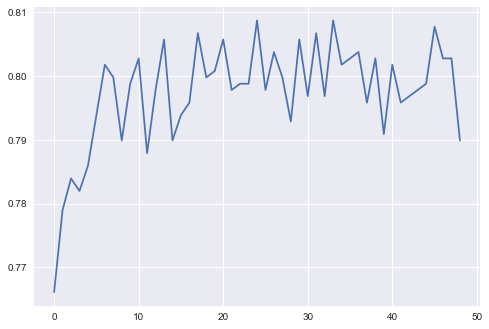

In [53]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [54]:
#Extraction the n_estimatiors with maximum accuracy
print(np.argmax(acc_list))

24


In [55]:
rf = RandomForestClassifier(n_estimators=24,max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=24)

In [56]:
rf.score(X_train,Y_train)

0.8434093161546086

In [65]:
y_pred_random = rf.predict(test_data_clean)
y_pred_random = [float(x) for x in y_pred_random]

In [66]:
result_random_forest = pd.DataFrame(np.array(y_pred_random) )

In [71]:
result_random_forest.columns = ["label"]
result_random_forest.head(10)

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,0.0
7,0.0
8,0.0
9,0.0


In [72]:
result_random_forest.to_csv("Titanic result 2.csv", index=True, index_label='Id')